### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\johne\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Loading the training and testing datasets

In [2]:
train=pd.read_csv(r"C:\John\ICTAK\Internship\Train.csv")
test=pd.read_csv(r"C:\John\ICTAK\Internship\Test.csv")

In [3]:
train

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0
31643,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,NaN,0,unknown,0
31644,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,NaN,0,unknown,0
31645,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,NaN,0,unknown,0


In [4]:
test

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,id_42406,29.0,management,single,tertiary,no,717.0,yes,no,cellular,15,jun,94.0,1.0,NaN,0,unknown
13560,id_14483,NaN,blue-collar,married,secondary,no,604.0,yes,no,telephone,10,jul,155.0,1.0,NaN,0,unknown
13561,id_43066,45.0,blue-collar,married,primary,no,237.0,yes,no,unknown,16,may,231.0,4.0,NaN,0,unknown
13562,id_18375,52.0,admin.,married,primary,no,241.0,yes,no,cellular,13,may,243.0,2.0,299.0,5,failure


# TRAIN DATA

In [5]:
tr=train.copy()

In [6]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [7]:
tr.describe(include='all')

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
count,31647,31028.000000,31647,31497,31647,31647,31248.000000,31647,31498,31647,31647.000000,31647,31336.000000,31535.000000,5816.000000,31647.000000,31647,31647.000000
unique,31647,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,NaN
top,id_43823,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,NaN
freq,1,NaN,6816,18945,16247,31094,NaN,17700,26463,20480,NaN,9685,NaN,NaN,NaN,NaN,25833,NaN
mean,NaN,40.439216,NaN,NaN,NaN,NaN,1368.112615,NaN,NaN,NaN,15.818561,NaN,256.184038,2.776629,224.995186,0.591620,NaN,0.107246
std,NaN,10.751392,NaN,NaN,NaN,NaN,3085.342417,NaN,NaN,NaN,8.322970,NaN,256.181479,3.153293,114.991828,2.499675,NaN,0.309430
min,NaN,18.000000,NaN,NaN,NaN,NaN,-8020.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,NaN,32.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,133.000000,0.000000,NaN,0.000000
50%,NaN,39.000000,NaN,NaN,NaN,NaN,449.000000,NaN,NaN,NaN,16.000000,NaN,179.000000,2.000000,195.000000,0.000000,NaN,0.000000
75%,NaN,48.000000,NaN,NaN,NaN,NaN,1413.000000,NaN,NaN,NaN,21.000000,NaN,315.250000,3.000000,329.000000,0.000000,NaN,0.000000


### Viewing the no. of missing values in each columns of the train data

In [8]:
tr.isnull().sum()

id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

### To check the no. of missing values and the unique no. of elements in each column

In [9]:
for i in tr.columns:
    if tr[i].isna().any() == False:
        print(i,' has no missing values')
        print(tr[i].value_counts())
        continue
    else:
        print(i,' has missing values')        
        print(tr[i].value_counts())

id  has no missing values
id
id_43823    1
id_34263    1
id_6392     1
id_3082     1
id_43162    1
           ..
id_2813     1
id_13538    1
id_1238     1
id_825      1
id_1723     1
Name: count, Length: 31647, dtype: int64
customer_age  has missing values
customer_age
34.0    1369
33.0    1344
32.0    1312
31.0    1258
36.0    1223
        ... 
95.0       1
97.0       1
89.0       1
93.0       1
92.0       1
Name: count, Length: 77, dtype: int64
job_type  has no missing values
job_type
blue-collar      6816
management       6666
technician       5220
admin.           3627
services         2923
retired          1591
self-employed    1111
entrepreneur     1037
unemployed        901
housemaid         893
student           663
unknown           199
Name: count, dtype: int64
marital  has missing values
marital
married     18945
single       8857
divorced     3695
Name: count, dtype: int64
education  has no missing values
education
secondary    16247
tertiary      9321
primary       4787
un

In [10]:
num_columns1=tr.select_dtypes(include=['int64','float64'])

In [11]:
num_columns1.columns

Index(['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'term_deposit_subscribed'],
      dtype='object')

### Checking the skew value of all the numerical columns

In [12]:
for i in num_columns1.columns:
    print(i,tr[i].skew())

customer_age 0.6619530687835736
balance 8.505127273489762
day_of_month 0.09190899020750912
last_contact_duration 3.1658690138459744
num_contacts_in_campaign 5.000171590168278
days_since_prev_campaign_contact 0.649478076491197
num_contacts_prev_campaign 45.83300679544707
term_deposit_subscribed 2.5387271995286125


### Filling the missing values with the most repeated entry, which is 'married'

In [13]:
tr.marital=train.marital.fillna('married')

In [14]:
tr.marital.value_counts()

marital
married     19095
single       8857
divorced     3695
Name: count, dtype: int64

### Filling the missing values with the most repeated entry, which is 'no'

In [15]:
tr.personal_loan=tr.personal_loan.fillna('no')

In [16]:
tr.personal_loan.value_counts()

personal_loan
no     26612
yes     5035
Name: count, dtype: int64

In [17]:
tr['customer_age'].mean()

40.43921619182674

### Filling the missing values with the mean values, which is 40

In [18]:
tr['customer_age']=tr['customer_age'].fillna(40)

In [19]:
tr['balance']=tr.balance.fillna(tr.balance.median())
tr['last_contact_duration']=tr.last_contact_duration.fillna(tr.last_contact_duration.median())
tr['num_contacts_in_campaign']=tr.num_contacts_in_campaign.fillna(tr.num_contacts_in_campaign.median())

### Double checking to ensure there are only missing values left in 1 column

In [20]:
tr.isnull().sum()

id                                      0
customer_age                            0
job_type                                0
marital                                 0
education                               0
default                                 0
balance                                 0
housing_loan                            0
personal_loan                           0
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                   0
num_contacts_in_campaign                0
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

In [21]:
# Id columns is not essential for the machine learning process, since it contains only distinct values.
# The 'days_since_prev_campaign_contact' has over 25831 null values out of 31647 rows (almost 82% of the values are absent). Due to the abundance of the missing values, the column is being deleted for further analysis.
tr.drop(['id','days_since_prev_campaign_contact'],axis=1,inplace=True)
tr

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,0,unknown,0
1,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,1,other,0
2,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,0,unknown,0
3,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,0,unknown,0
4,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,3,other,0
31643,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,0,unknown,0
31644,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,0,unknown,0
31645,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,0,unknown,0


In [22]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_age                31647 non-null  float64
 1   job_type                    31647 non-null  object 
 2   marital                     31647 non-null  object 
 3   education                   31647 non-null  object 
 4   default                     31647 non-null  object 
 5   balance                     31647 non-null  float64
 6   housing_loan                31647 non-null  object 
 7   personal_loan               31647 non-null  object 
 8   communication_type          31647 non-null  object 
 9   day_of_month                31647 non-null  int64  
 10  month                       31647 non-null  object 
 11  last_contact_duration       31647 non-null  float64
 12  num_contacts_in_campaign    31647 non-null  float64
 13  num_contacts_prev_campaign  316

In [23]:
num_columns1=tr.select_dtypes(include=['int64','float64'])
for i in num_columns1.drop(['num_contacts_in_campaign','term_deposit_subscribed'],axis=1):
  print('  ', i)
  print('  ----')
  print('Outlier handling of', i)

  #Calculating the interquartile range
  Q1 = np.percentile(tr[i],25,method='midpoint')
  Q2 = np.percentile(tr[i],50,method='midpoint')
  Q3 = np.percentile(tr[i],75,method='midpoint')
  IQR =Q3 - Q1

    
  print("Q1 is: ",Q1)
  print("Q2 is: ",Q2)
  print("Q3 is: ",Q3)
  print('IQR =',IQR)

    
  #Finding the lower limit and upper limit
  low_lim = Q1 - 1.5*IQR
  up_lim = Q3 +1.5*IQR
  print('lower limit = ',low_lim )
  print('upper limit  ',up_lim )

  #Finding outliers
  outliers =[]


  for x in tr[i]:
    if((x < low_lim) or (x > up_lim)):
      outliers.append(x)

  print(len(outliers))
  print('outliers : ',outliers)
    
  tr[i]=tr[i].clip(lower=low_lim,upper=up_lim)
  outliers=[]    
  for x in tr[i]:
    if((x < low_lim) or (x > up_lim)):
      outliers.append(x)

  print(len(outliers))   

   customer_age
  ----
Outlier handling of customer_age
Q1 is:  32.0
Q2 is:  39.0
Q3 is:  48.0
IQR = 16.0
lower limit =  8.0
upper limit   72.0
257
outliers :  [78.0, 76.0, 73.0, 88.0, 73.0, 81.0, 79.0, 73.0, 77.0, 75.0, 74.0, 74.0, 86.0, 77.0, 79.0, 75.0, 95.0, 77.0, 74.0, 74.0, 79.0, 76.0, 74.0, 76.0, 73.0, 80.0, 75.0, 79.0, 77.0, 74.0, 82.0, 79.0, 76.0, 75.0, 82.0, 73.0, 76.0, 86.0, 73.0, 77.0, 80.0, 83.0, 78.0, 75.0, 74.0, 75.0, 77.0, 74.0, 77.0, 76.0, 77.0, 77.0, 79.0, 79.0, 73.0, 79.0, 75.0, 83.0, 84.0, 73.0, 79.0, 77.0, 76.0, 78.0, 74.0, 74.0, 83.0, 73.0, 78.0, 81.0, 73.0, 73.0, 76.0, 75.0, 80.0, 75.0, 84.0, 73.0, 80.0, 74.0, 74.0, 76.0, 78.0, 78.0, 75.0, 97.0, 81.0, 82.0, 75.0, 77.0, 77.0, 73.0, 76.0, 75.0, 87.0, 73.0, 73.0, 84.0, 81.0, 80.0, 73.0, 73.0, 73.0, 86.0, 78.0, 82.0, 79.0, 77.0, 76.0, 75.0, 87.0, 73.0, 80.0, 80.0, 81.0, 80.0, 91.0, 80.0, 73.0, 77.0, 85.0, 74.0, 74.0, 75.0, 74.0, 73.0, 75.0, 86.0, 75.0, 74.0, 75.0, 75.0, 80.0, 75.0, 75.0, 85.0, 74.0, 77.0, 74.0, 83.0,

### Some columns had outliers, and they were clipped using their respective Interquartile ranges. 

### Since there is no strong correlation between any features,  we cannot remove any columns

In [24]:
num_columns1.corr()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
customer_age,1.000000,0.101928,-0.012611,-0.006726,0.006015,-0.001415,0.030969
balance,0.101928,1.000000,0.001763,0.016436,-0.020767,0.011506,0.052029
day_of_month,-0.012611,0.001763,1.000000,-0.034422,0.164792,-0.050596,-0.026898
last_contact_duration,-0.006726,0.016436,-0.034422,1.000000,-0.085815,0.004889,0.414666
num_contacts_in_campaign,0.006015,-0.020767,0.164792,-0.085815,1.000000,-0.033191,-0.070574
num_contacts_prev_campaign,-0.001415,0.011506,-0.050596,0.004889,-0.033191,1.000000,0.089881
term_deposit_subscribed,0.030969,0.052029,-0.026898,0.414666,-0.070574,0.089881,1.000000


# EXPLORATORY DATA ANALYSIS

Text(0.5, 1.0, 'Type of Jobs vs Age of Customer')

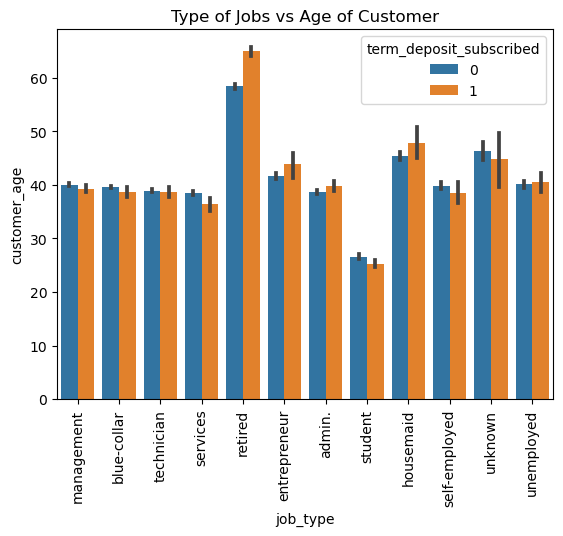

In [25]:
sns.barplot(data=tr,x='job_type',y='customer_age',hue='term_deposit_subscribed')
plt.xticks(rotation=90)
plt.title('Type of Jobs vs Age of Customer')

Text(0.5, 1.0, 'Marital Status vs Age of Customer')

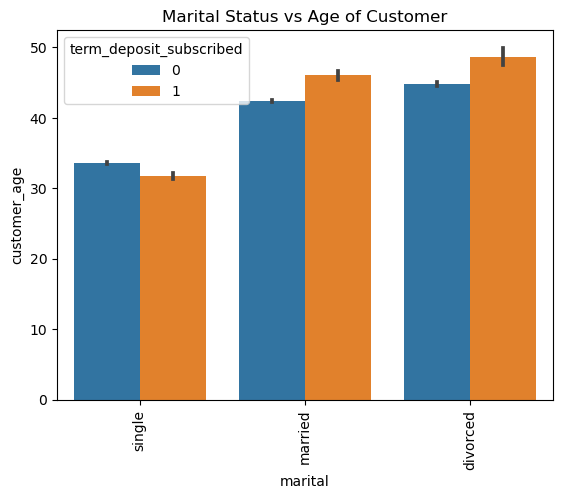

In [26]:
sns.barplot(data=tr,x='marital',y='customer_age',hue='term_deposit_subscribed')
plt.xticks(rotation=90)
plt.title('Marital Status vs Age of Customer')

Text(0.5, 1.0, 'Level of Education vs Age of Customer')

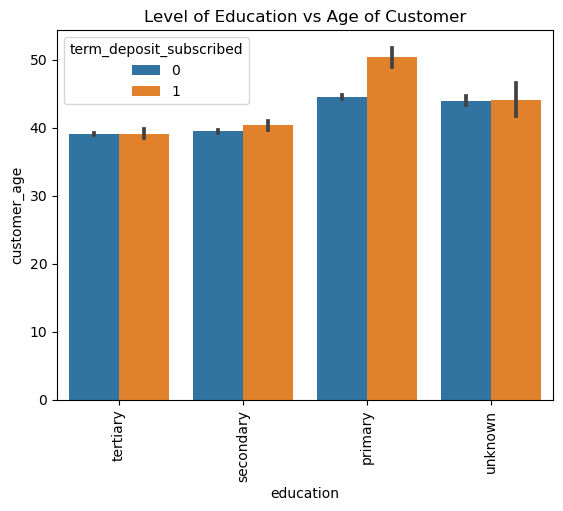

In [27]:
sns.barplot(data=tr,x='education',y='customer_age',hue='term_deposit_subscribed')
plt.xticks(rotation=90)
plt.title('Level of Education vs Age of Customer')

Text(0.5, 1.0, 'Default vs Age of Customer')

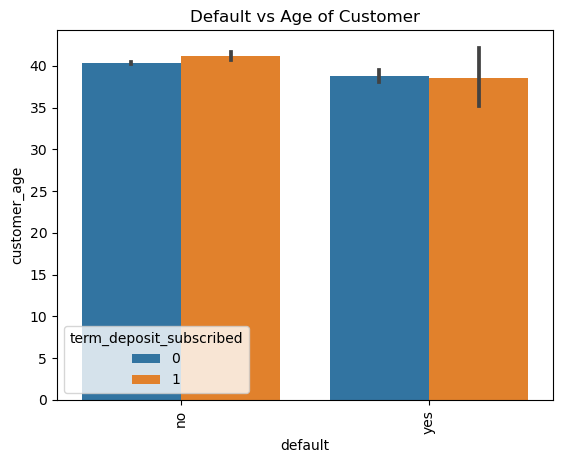

In [28]:
sns.barplot(data=tr,x='default',y='customer_age',hue='term_deposit_subscribed')
plt.xticks(rotation=90)
plt.title('Default vs Age of Customer')

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

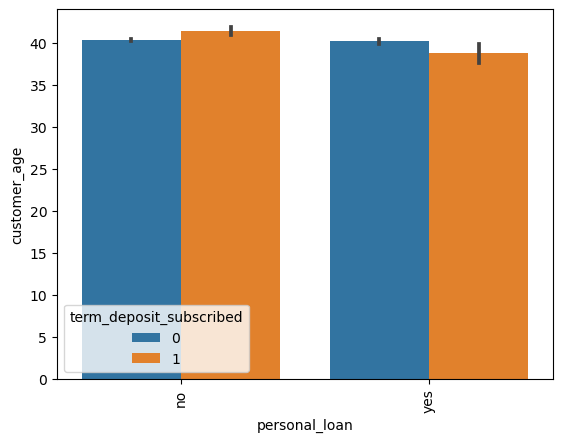

In [29]:
sns.barplot(data=tr,x='personal_loan',y='customer_age',hue='term_deposit_subscribed')
plt.xticks(rotation=90)

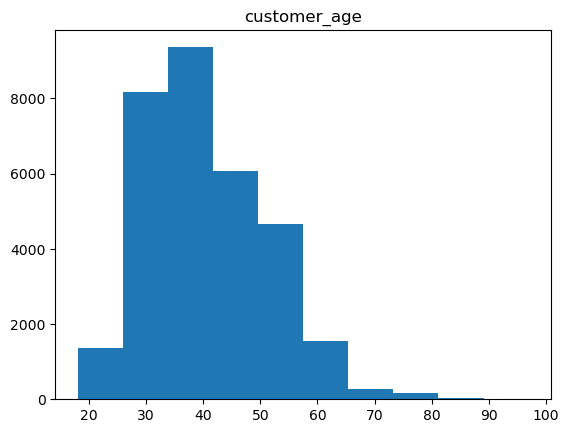

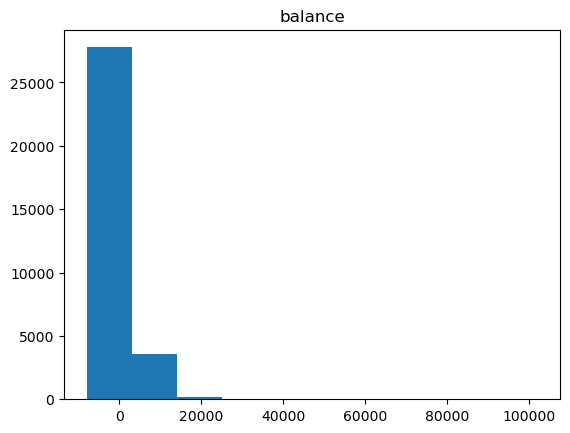

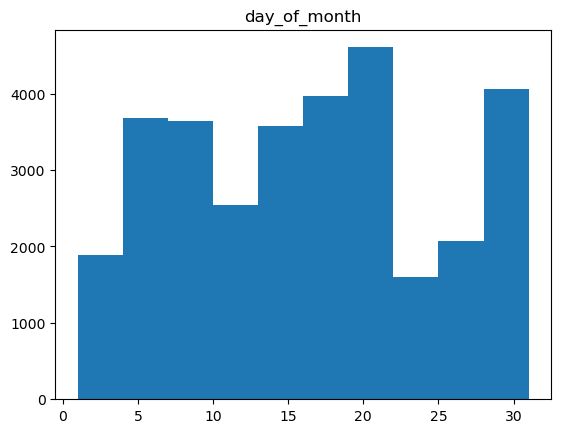

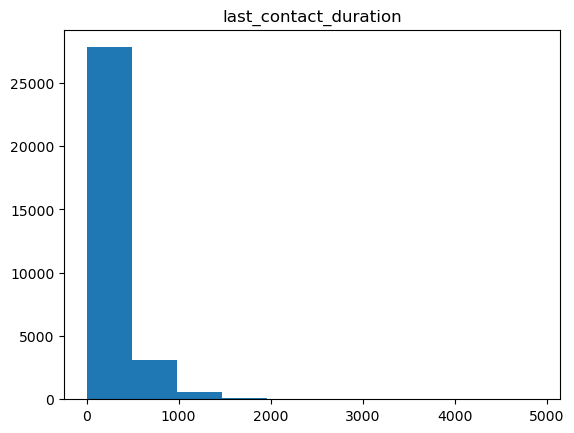

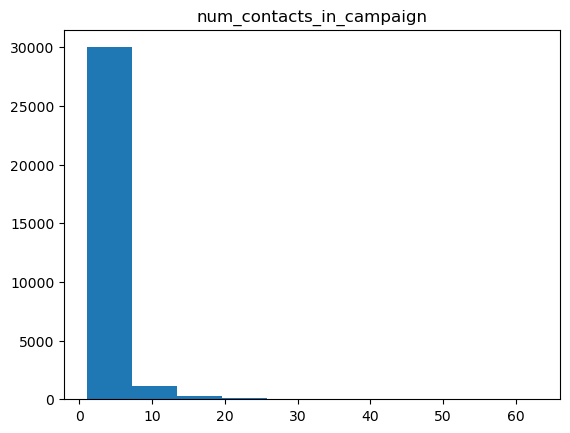

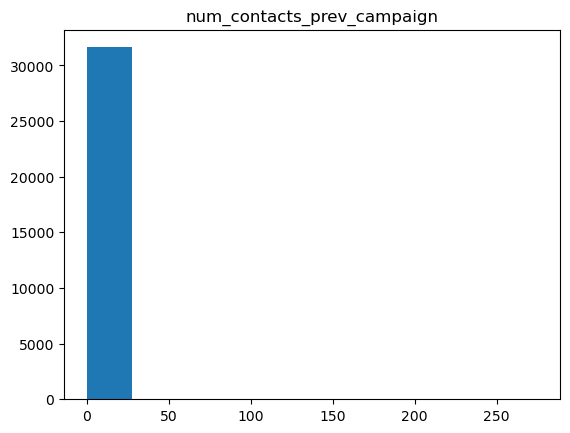

In [30]:
# To vsiualize the histograms of the numerical columns of the training dataset
for i in num_columns1.drop('term_deposit_subscribed',axis=1):
    plt.hist(num_columns1[i])
    plt.title(i)
    plt.show()

In [31]:
num_tr=tr.select_dtypes(include=['float64','int64'])
num_tr

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
0,28.0,285.0,26,303.0,4.0,0,0
1,34.0,934.0,18,143.0,2.0,0,0
2,46.0,656.0,5,101.0,4.0,0,0
3,34.0,2.0,20,127.0,3.0,0,0
4,41.0,1352.0,13,49.0,2.0,0,0
...,...,...,...,...,...,...,...
31642,58.0,567.0,2,99.0,2.0,0,0
31643,51.0,1072.0,20,31.0,7.0,0,0
31644,41.0,242.0,23,89.0,2.0,0,0
31645,48.0,2699.0,11,216.0,6.0,0,0


In [32]:
num_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_age                31647 non-null  float64
 1   balance                     31647 non-null  float64
 2   day_of_month                31647 non-null  int64  
 3   last_contact_duration       31647 non-null  float64
 4   num_contacts_in_campaign    31647 non-null  float64
 5   num_contacts_prev_campaign  31647 non-null  int64  
 6   term_deposit_subscribed     31647 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.7 MB


In [33]:
B=num_tr.values

In [34]:
num_tr

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
0,28.0,285.0,26,303.0,4.0,0,0
1,34.0,934.0,18,143.0,2.0,0,0
2,46.0,656.0,5,101.0,4.0,0,0
3,34.0,2.0,20,127.0,3.0,0,0
4,41.0,1352.0,13,49.0,2.0,0,0
...,...,...,...,...,...,...,...
31642,58.0,567.0,2,99.0,2.0,0,0
31643,51.0,1072.0,20,31.0,7.0,0,0
31644,41.0,242.0,23,89.0,2.0,0,0
31645,48.0,2699.0,11,216.0,6.0,0,0


## The final training dataset

# KMEANS

In [35]:
x=num_tr.values

In [36]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,16):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=2)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss   

[42772100347.50685,
 9348129645.73526,
 4584429950.351259,
 3111162947.3784523,
 2389606806.0088882,
 1974465733.9590821,
 1675973518.9190664,
 1509241736.3878484,
 1242102709.9878013,
 1143731954.1558006,
 1022041497.8883811,
 935921964.5669143,
 866101072.3383219,
 812518895.8290436,
 748290503.6533769]

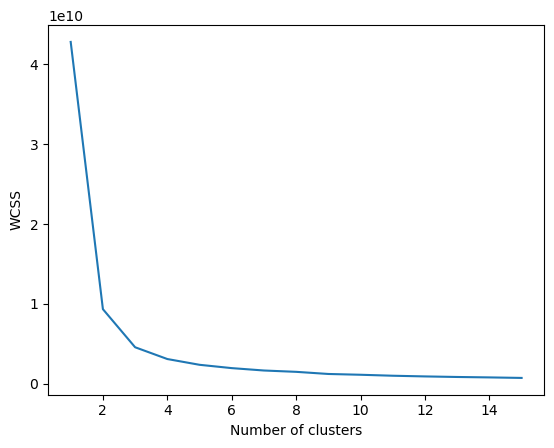

In [37]:
plt.plot(range(1,16),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=60)
y_kmeans=kmeans.fit_predict(x)
yy=pd.DataFrame(y_kmeans)
yy.value_counts()

0
1    24541
0     7106
Name: count, dtype: int64

In [39]:
from sklearn.metrics import silhouette_score as ss
sss=ss(x,y_kmeans)
print(sss)

0.7176771662414142


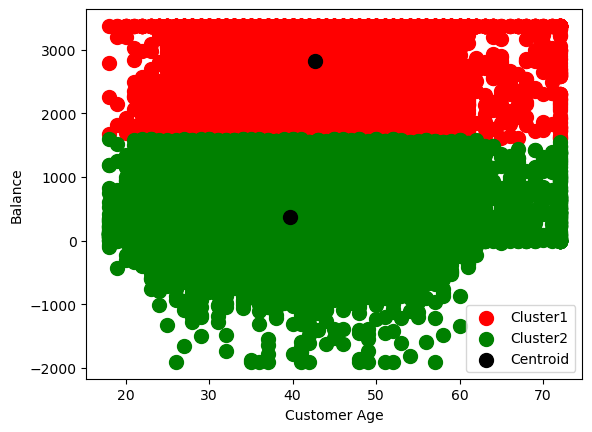

In [40]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='green',label='Cluster2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroid')
plt.xlabel("Customer Age")
plt.ylabel('Balance')
plt.legend()
plt.show()

### So, there are 2 clusters for the train dataset

In [41]:
trtr=tr.copy()
trtr['clusters']=y_kmeans
one=trtr[trtr['clusters']==0]
two=trtr[trtr['clusters']==1]

In [42]:
one

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,clusters
5,65.0,retired,married,primary,no,2880.0,no,no,cellular,23,apr,163.0,1.0,0,unknown,1,0
10,52.0,blue-collar,married,tertiary,no,1779.0,no,no,cellular,19,nov,628.0,3.0,0,failure,0,0
11,35.0,technician,single,secondary,no,3372.5,yes,no,cellular,7,may,303.0,2.0,0,unknown,0,0
13,50.0,management,married,secondary,no,3372.5,no,no,telephone,6,feb,381.0,6.0,0,failure,0,0
28,45.0,admin.,single,secondary,no,3372.5,yes,no,cellular,20,nov,101.0,1.0,0,unknown,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31617,51.0,blue-collar,married,tertiary,no,3372.5,yes,no,cellular,21,nov,59.0,3.0,0,unknown,0,0
31621,52.0,technician,married,secondary,no,1764.0,yes,no,unknown,12,jun,238.0,2.0,0,unknown,0,0
31623,41.0,management,married,tertiary,no,3372.5,no,no,cellular,17,nov,80.0,1.0,0,unknown,0,0
31635,59.0,management,married,tertiary,no,3372.5,no,no,cellular,4,may,122.0,5.0,0,unknown,0,0


In [43]:
two

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,clusters
0,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,0,unknown,0,1
1,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,0,other,0,1
2,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,0,unknown,0,1
3,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,0,unknown,0,1
4,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,0,unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31641,26.0,technician,single,secondary,no,459.0,no,no,cellular,29,jan,237.0,1.0,0,other,0,1
31642,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,0,other,0,1
31643,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,0,unknown,0,1
31644,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,0,unknown,0,1


## The 2 datasets shown above represent all the data regarding each customer in a cluster

#  TEST DATASET

In [44]:
test

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,id_42406,29.0,management,single,tertiary,no,717.0,yes,no,cellular,15,jun,94.0,1.0,NaN,0,unknown
13560,id_14483,NaN,blue-collar,married,secondary,no,604.0,yes,no,telephone,10,jul,155.0,1.0,NaN,0,unknown
13561,id_43066,45.0,blue-collar,married,primary,no,237.0,yes,no,unknown,16,may,231.0,4.0,NaN,0,unknown
13562,id_18375,52.0,admin.,married,primary,no,241.0,yes,no,cellular,13,may,243.0,2.0,299.0,5,failure


In [45]:
te=test.copy()

In [46]:
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                13564 non-null  object 
 1   customer_age                      13294 non-null  float64
 2   job_type                          13564 non-null  object 
 3   marital                           13483 non-null  object 
 4   education                         13564 non-null  object 
 5   default                           13564 non-null  object 
 6   balance                           13383 non-null  float64
 7   housing_loan                      13564 non-null  object 
 8   personal_loan                     13490 non-null  object 
 9   communication_type                13564 non-null  object 
 10  day_of_month                      13564 non-null  int64  
 11  month                             13564 non-null  object 
 12  last

### Viewing the no. of missing values in each columns of the train data

In [47]:
te.isnull().sum()

id                                      0
customer_age                          270
job_type                                0
marital                                81
education                               0
default                                 0
balance                               181
housing_loan                            0
personal_loan                          74
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 122
num_contacts_in_campaign               45
days_since_prev_campaign_contact    11123
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
dtype: int64

### To check the no. of missing values and the unique no. of elements in each column

In [48]:
for i in te.columns:
    if te[i].isna().any() == False:
        print(i,' has no missing values')
        print(te[i].value_counts())
        continue
    else:
        print(te[i].value_counts())

id  has no missing values
id
id_17231    1
id_41344    1
id_9055     1
id_2649     1
id_44110    1
           ..
id_21776    1
id_38591    1
id_41677    1
id_3631     1
id_12898    1
Name: count, Length: 13564, dtype: int64
customer_age
32.0    549
33.0    548
34.0    544
31.0    539
30.0    531
       ... 
94.0      1
87.0      1
91.0      1
90.0      1
86.0      1
Name: count, Length: 73, dtype: int64
job_type  has no missing values
job_type
blue-collar      2916
management       2792
technician       2377
admin.           1544
services         1231
retired           673
self-employed     468
entrepreneur      450
unemployed        402
housemaid         347
student           275
unknown            89
Name: count, dtype: int64
marital
married     8123
single      3869
divorced    1491
Name: count, dtype: int64
education  has no missing values
education
secondary    6955
tertiary     3980
primary      2064
unknown       565
Name: count, dtype: int64
default  has no missing values
defau

In [49]:
num_columns2=te.select_dtypes(include=['int64','float64'])

### Checking the skew value of all the numerical columns

In [50]:
for i in num_columns2.columns:
    print(i,te[i].skew())

customer_age 0.6667091690008243
balance 6.76816371599829
day_of_month 0.09581935056612031
last_contact_duration 3.0616611634135267
num_contacts_in_campaign 4.436171195112908
days_since_prev_campaign_contact 0.7950170097776396
num_contacts_prev_campaign 6.26169287348231


In [51]:
te.customer_age.mean()

40.450428764856326

### Filling the missing values with the mean values, which is 40

In [52]:
te['customer_age']=te['customer_age'].fillna(40)

In [53]:
te.marital.value_counts()

marital
married     8123
single      3869
divorced    1491
Name: count, dtype: int64

In [54]:
te.personal_loan.value_counts()

personal_loan
no     11314
yes     2176
Name: count, dtype: int64

### Filling the missing values in marital column with the most repeated entry, which is 'married'
### Filling the missing values in personal_loan column with the most repeated entry, which is 'no'

In [55]:
te.marital=te.marital.fillna('married')
te.personal_loan=te.personal_loan.fillna('no')

In [56]:
te['balance']=te.balance.fillna(te.balance.median())
te['last_contact_duration']=te.last_contact_duration.fillna(te.last_contact_duration.median())
te['num_contacts_in_campaign']=te.num_contacts_in_campaign.fillna(te.num_contacts_in_campaign.median())

### Double checking to ensure there are only missing values left in 1 column

In [57]:
te.isnull().sum()

id                                      0
customer_age                            0
job_type                                0
marital                                 0
education                               0
default                                 0
balance                                 0
housing_loan                            0
personal_loan                           0
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                   0
num_contacts_in_campaign                0
days_since_prev_campaign_contact    11123
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
dtype: int64

In [58]:
for i in num_columns2.drop('days_since_prev_campaign_contact',axis=1):
  print('  ', i)
  print('  ----')
  print('Outlier handling of', i)

  #Calculating the interquartile range
  Q1 = np.percentile(te[i],25,method='midpoint')
  Q2 = np.percentile(te[i],50,method='midpoint')
  Q3 = np.percentile(te[i],75,method='midpoint')
  IQR =Q3 - Q1

    
  print("Q1 is: ",Q1)
  print("Q2 is: ",Q2)
  print("Q3 is: ",Q3)
  print('IQR =',IQR)

    
  #Finding the lower limit and upper limit
  low_lim = Q1 - 1.5*IQR
  up_lim = Q3 +1.5*IQR
  print('lower limit = ',low_lim )
  print('upper limit  ',up_lim )

  #Finding outliers
  outliers =[]


  for x in te[i]:
    if((x < low_lim) or (x > up_lim)):
      outliers.append(x)

  print(len(outliers))
  print('outliers : ',outliers)
 
  te[i]=te[i].clip(lower=low_lim,upper=up_lim)
  
  outliers=[]
  for x in te[i]:
    if((x < low_lim) or (x > up_lim)):
      outliers.append(x)

  print(len(outliers))  

   customer_age
  ----
Outlier handling of customer_age
Q1 is:  32.0
Q2 is:  39.0
Q3 is:  48.0
IQR = 16.0
lower limit =  8.0
upper limit   72.0
100
outliers :  [79.0, 73.0, 74.0, 73.0, 78.0, 81.0, 80.0, 80.0, 73.0, 81.0, 81.0, 79.0, 73.0, 79.0, 80.0, 75.0, 73.0, 79.0, 85.0, 74.0, 73.0, 77.0, 74.0, 75.0, 85.0, 75.0, 85.0, 78.0, 73.0, 82.0, 76.0, 81.0, 84.0, 75.0, 83.0, 76.0, 80.0, 81.0, 76.0, 75.0, 74.0, 83.0, 80.0, 79.0, 84.0, 82.0, 94.0, 80.0, 81.0, 76.0, 73.0, 79.0, 82.0, 79.0, 84.0, 78.0, 80.0, 78.0, 74.0, 78.0, 73.0, 73.0, 82.0, 79.0, 75.0, 87.0, 78.0, 73.0, 79.0, 81.0, 81.0, 81.0, 77.0, 91.0, 80.0, 77.0, 78.0, 74.0, 84.0, 84.0, 79.0, 74.0, 83.0, 77.0, 74.0, 79.0, 78.0, 77.0, 74.0, 77.0, 77.0, 74.0, 74.0, 84.0, 80.0, 85.0, 90.0, 86.0, 78.0, 75.0]
0
   balance
  ----
Outlier handling of balance
Q1 is:  75.0
Q2 is:  447.0
Q3 is:  1435.5
IQR = 1360.5
lower limit =  -1965.75
upper limit   3476.25
1391
outliers :  [7136.0, 6023.0, 3815.0, 5240.0, 3492.0, 10758.0, 6731.0, 4408.0, 19099.0

### Some columns had outliers, and they were clipped using their respective Interquartile ranges.

### Since there is no strong correlation between any features,  we cannot remove any columns

In [59]:
num_columns2.corr()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign
customer_age,1.000000,0.071056,-0.003546,0.004736,0.004224,-0.093793,0.006383
balance,0.071056,1.000000,0.009223,0.032500,0.004399,-0.096155,0.033431
day_of_month,-0.003546,0.009223,1.000000,-0.021915,0.155727,-0.123612,-0.057912
last_contact_duration,0.004736,0.032500,-0.021915,1.000000,-0.083385,-0.025486,-0.015006
num_contacts_in_campaign,0.004224,0.004399,0.155727,-0.083385,1.000000,0.061568,-0.033046
days_since_prev_campaign_contact,-0.093793,-0.096155,-0.123612,-0.025486,0.061568,1.000000,-0.040578
num_contacts_prev_campaign,0.006383,0.033431,-0.057912,-0.015006,-0.033046,-0.040578,1.000000


Text(0.5, 1.0, 'Type of Jobs vs Age of Customer')

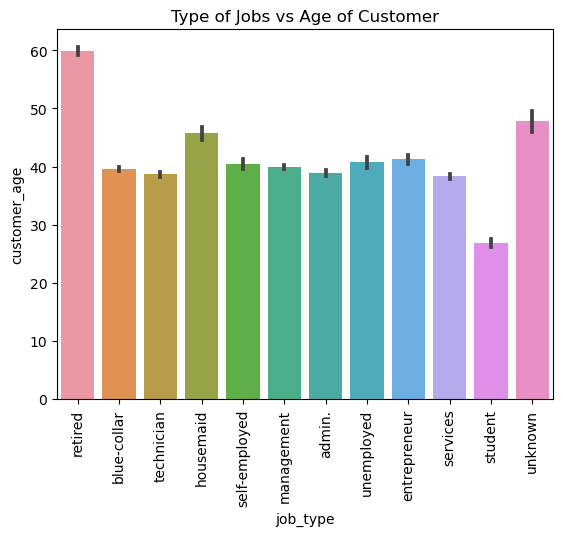

In [60]:
sns.barplot(data=te,x='job_type',y='customer_age')
plt.xticks(rotation=90)
plt.title('Type of Jobs vs Age of Customer')

Text(0.5, 1.0, 'Marital Status vs Age of Customer')

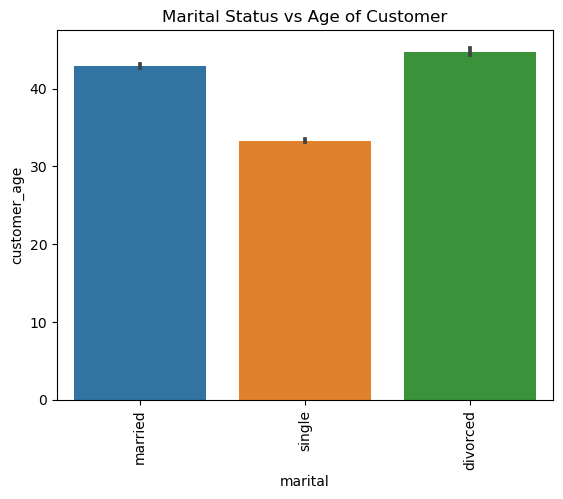

In [61]:
sns.barplot(data=te,x='marital',y='customer_age')
plt.xticks(rotation=90)
plt.title('Marital Status vs Age of Customer')

Text(0.5, 1.0, 'Level of Education vs Age of Customer')

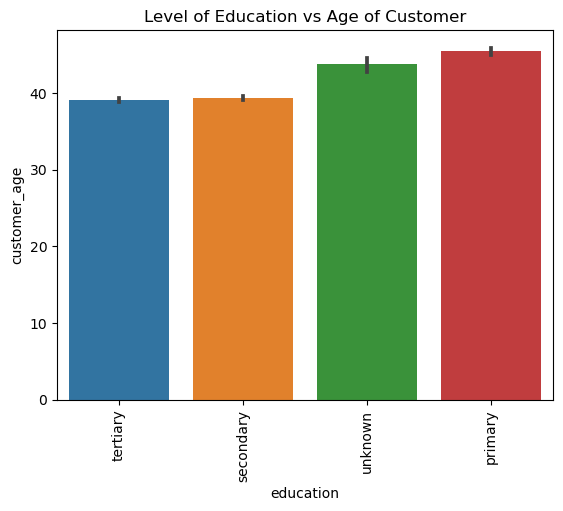

In [62]:
sns.barplot(data=te,x='education',y='customer_age')
plt.xticks(rotation=90)
plt.title('Level of Education vs Age of Customer')

Text(0.5, 1.0, 'Default vs Age of Customer')

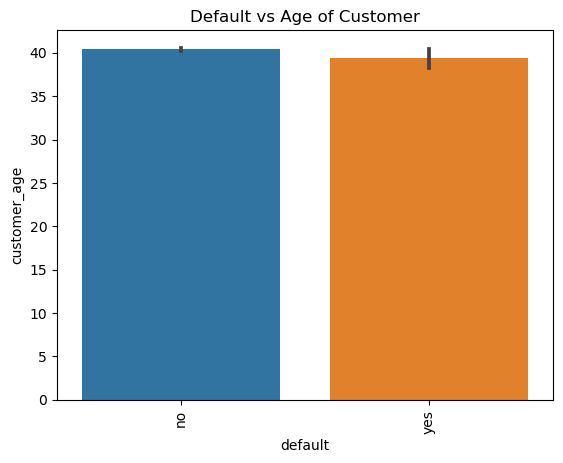

In [63]:
sns.barplot(data=te,x='default',y='customer_age')
plt.xticks(rotation=90)
plt.title('Default vs Age of Customer')

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

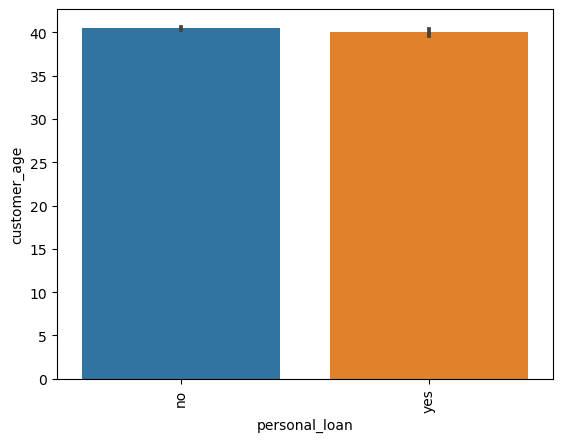

In [64]:
sns.barplot(data=te,x='personal_loan',y='customer_age')
plt.xticks(rotation=90)

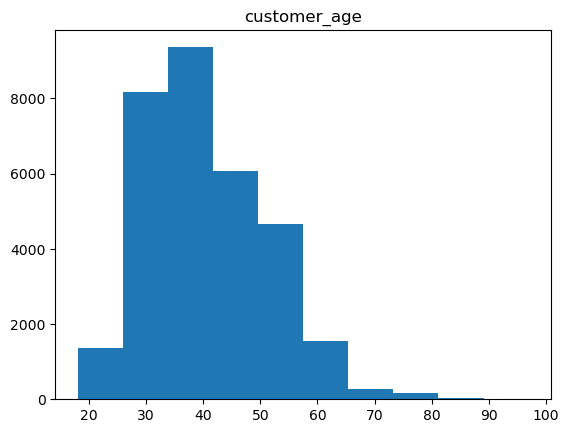

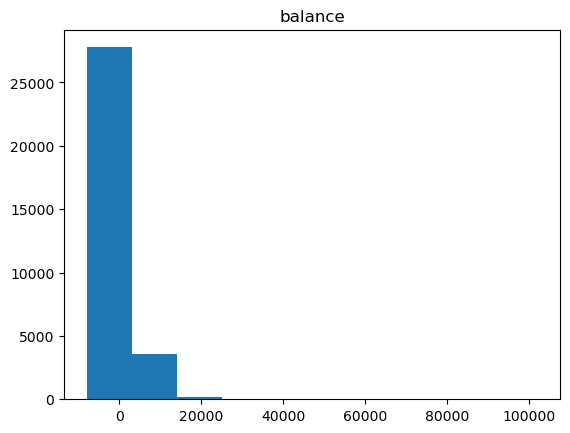

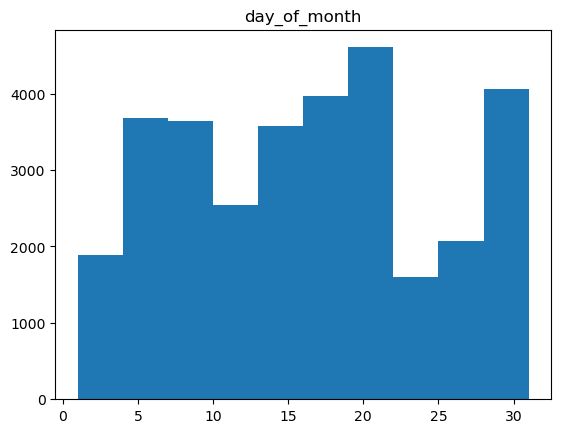

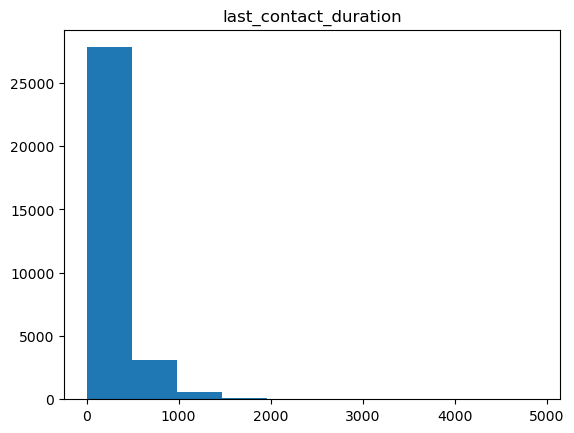

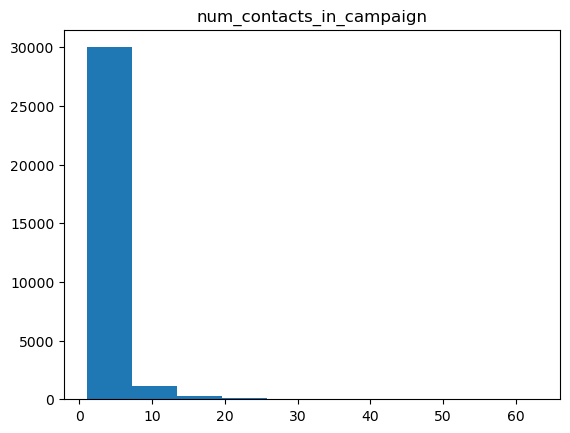

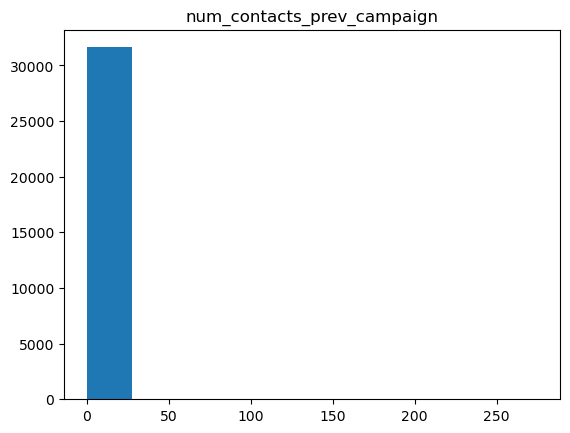

In [65]:
# To vsiualize the histograms of the numerical columns of the testing dataset
for i in num_columns2.drop('days_since_prev_campaign_contact',axis=1):
    plt.hist(num_columns1[i])
    plt.title(i)
    plt.show()

In [66]:
# Id columns is not essential for the machine learning process, since it contains only distinct values.
# The 'days_since_prev_campaign_contact' has over 11123 null values out of 13564 rows (almost 82% of the values are absent). Due to the abundance of the missing values, the column is being deleted for further analysis.
te.drop(['id','days_since_prev_campaign_contact'],axis=1,inplace=True)
te

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,55.0,retired,married,tertiary,no,3476.25,no,no,cellular,13,aug,90.0,2.0,0,unknown
1,24.0,blue-collar,single,secondary,no,179.00,yes,no,cellular,18,may,63.0,2.0,0,unknown
2,46.0,technician,divorced,secondary,no,143.00,no,no,cellular,8,jul,208.0,1.0,0,unknown
3,56.0,housemaid,single,unknown,no,3476.25,no,no,unknown,6,jun,34.0,1.0,0,unknown
4,62.0,retired,married,secondary,no,2913.00,no,no,cellular,12,apr,127.0,1.0,0,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,29.0,management,single,tertiary,no,717.00,yes,no,cellular,15,jun,94.0,1.0,0,unknown
13560,40.0,blue-collar,married,secondary,no,604.00,yes,no,telephone,10,jul,155.0,1.0,0,unknown
13561,45.0,blue-collar,married,primary,no,237.00,yes,no,unknown,16,may,231.0,4.0,0,unknown
13562,52.0,admin.,married,primary,no,241.00,yes,no,cellular,13,may,243.0,2.0,0,failure


In [67]:
num_te=te.select_dtypes(include=['float64','int64'])
num_te

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign
0,55.0,3476.25,13,90.0,2.0,0
1,24.0,179.00,18,63.0,2.0,0
2,46.0,143.00,8,208.0,1.0,0
3,56.0,3476.25,6,34.0,1.0,0
4,62.0,2913.00,12,127.0,1.0,0
...,...,...,...,...,...,...
13559,29.0,717.00,15,94.0,1.0,0
13560,40.0,604.00,10,155.0,1.0,0
13561,45.0,237.00,16,231.0,4.0,0
13562,52.0,241.00,13,243.0,2.0,0


## The final testing dataset

# KMEANS

In [68]:
X=num_te.values

# FOR TRAINING DATA

In [69]:
wcss=[]
for i in range(1,16):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=2)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss   

[19248824750.069515,
 4284727737.8170156,
 2086933415.6228611,
 1415347090.4677358,
 1104233290.155625,
 919836950.5809008,
 782111364.0498127,
 650716801.900095,
 573764338.6805247,
 519489918.32270455,
 476339156.32694167,
 442462402.0244281,
 409143395.1651317,
 385034761.1834272,
 363255106.6091887]

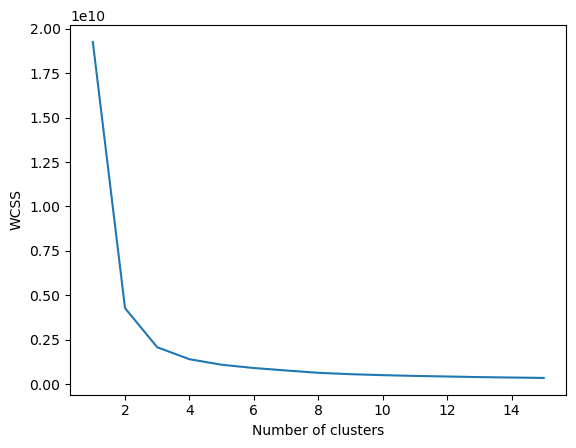

In [70]:
plt.plot(range(1,16),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [71]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=2)
y_kmeans=kmeans.fit_predict(X)
yy=pd.DataFrame(y_kmeans)
yy.value_counts()

0
0    10471
1     3093
Name: count, dtype: int64

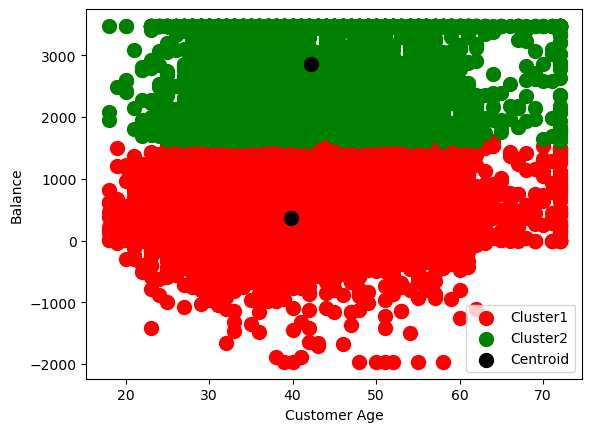

In [72]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='green',label='Cluster2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroid')
plt.xlabel("Customer Age")
plt.ylabel('Balance')
plt.legend()
plt.show()

In [73]:
from sklearn.metrics import silhouette_score as ss
sss=ss(X,y_kmeans)
print(sss)

0.7133871852498002


### So, there are 2 clusters for the test dataset

In [74]:
tete=te.copy()
tete['clusters']=y_kmeans
one=tete[tete['clusters']==0]
two=tete[tete['clusters']==1]

In [75]:
one

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,clusters
1,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,0,unknown,0
2,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,0,unknown,0
5,35.0,self-employed,single,tertiary,no,355.0,no,no,cellular,12,aug,599.0,1.0,0,unknown,0
6,27.0,housemaid,single,secondary,no,718.0,yes,no,unknown,8,may,94.0,3.0,0,unknown,0
7,29.0,management,single,tertiary,no,54.0,yes,yes,unknown,26,may,253.0,3.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,29.0,management,single,tertiary,no,717.0,yes,no,cellular,15,jun,94.0,1.0,0,unknown,0
13560,40.0,blue-collar,married,secondary,no,604.0,yes,no,telephone,10,jul,155.0,1.0,0,unknown,0
13561,45.0,blue-collar,married,primary,no,237.0,yes,no,unknown,16,may,231.0,4.0,0,unknown,0
13562,52.0,admin.,married,primary,no,241.0,yes,no,cellular,13,may,243.0,2.0,0,failure,0


In [76]:
two

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,clusters
0,55.0,retired,married,tertiary,no,3476.25,no,no,cellular,13,aug,90.0,2.0,0,unknown,1
3,56.0,housemaid,single,unknown,no,3476.25,no,no,unknown,6,jun,34.0,1.0,0,unknown,1
4,62.0,retired,married,secondary,no,2913.00,no,no,cellular,12,apr,127.0,1.0,0,success,1
8,50.0,housemaid,married,secondary,no,3476.25,no,no,unknown,9,jun,136.0,2.0,0,unknown,1
11,51.0,technician,married,secondary,no,3476.25,no,no,cellular,25,aug,52.0,4.0,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13542,55.0,unemployed,married,secondary,no,2549.00,yes,no,unknown,15,may,170.0,2.0,0,unknown,1
13546,58.0,technician,married,secondary,no,3476.25,yes,no,cellular,25,feb,654.5,1.0,0,failure,1
13549,26.0,technician,married,secondary,no,3476.25,yes,no,cellular,20,apr,140.0,3.0,0,failure,1
13551,40.0,blue-collar,married,primary,no,3322.00,no,no,cellular,9,jul,114.0,1.0,0,unknown,1


## The 2 datasets shown above represent all the data regarding each customer in a cluster